In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv


In [22]:
df = pd.read_csv('/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv')

**PRE-PROCESSING**

In [23]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [24]:
df.tail()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy
601,2023/06/16 9:16:05 AM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Multiple times a day,Keyword,Multiple pages,3,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,3,Product recommendations,Product quality and accuracy


In [25]:
duplicate_rows = df.duplicated()
print(duplicate_rows.sum())

0


In [26]:
# To find the sum of null values in the dataset
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [27]:
df.Product_Search_Method.mode()

0    categories
Name: Product_Search_Method, dtype: object

In [28]:
df.Product_Search_Method.value_counts()

categories    223
Keyword       214
Filter        127
others         36
Name: Product_Search_Method, dtype: int64

In [29]:
unique_counts = df['Purchase_Categories'].value_counts()
print(unique_counts)

Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                106
others                                                                                               48
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     24
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others                    

In [30]:
unique_counts = df['Browsing_Frequency'].value_counts()
print(unique_counts)

Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: Browsing_Frequency, dtype: int64


In [31]:
unique_counts = df['Gender'].value_counts()
print(unique_counts)

Female               352
Male                 142
Prefer not to say     89
Others                19
Name: Gender, dtype: int64


In [32]:
unique_counts = df['Improvement_Areas'].value_counts()
print(unique_counts)

Customer service responsiveness                                                   217
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     79
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much better than going to ne

The feedback from customer on the improvement area shown that the highest result obtained is on customer service responsive. 

**EXPLORATORY DATA ANALYSIS**

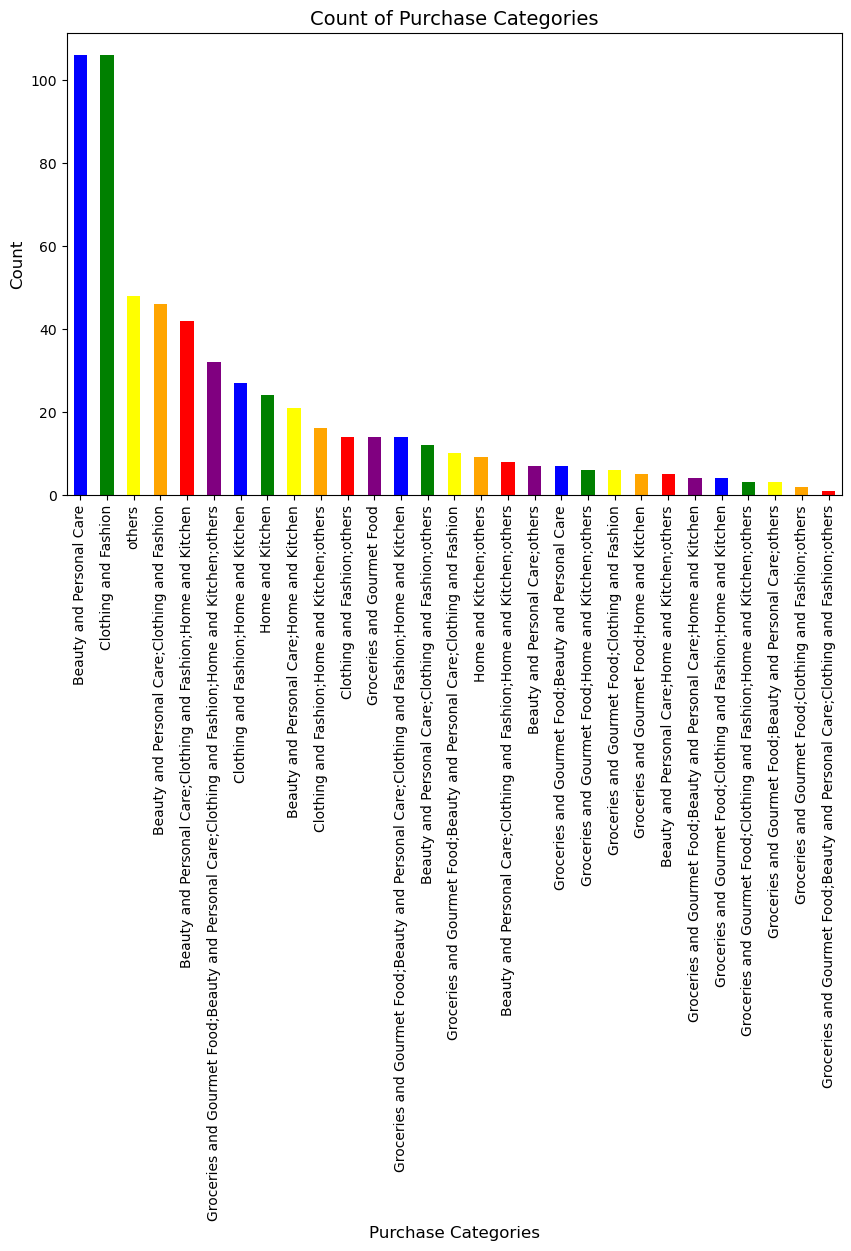

In [33]:
#Bar chart of purchase categories
purchase_counts = df['Purchase_Categories'].value_counts()
colors = ['blue', 'green','yellow', 'orange', 'red', 'purple']
plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='bar', color=colors)
plt.xlabel('Purchase Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Purchase Categories', fontsize=14)
plt.show()

The graph above clearly shows that the highest purchase category is beauty and personal care.

In [34]:
unique_counts = df['Purchase_Frequency'].value_counts()
print(unique_counts)

Few times a month         203
Less than once a month    124
Once a week               112
Once a month              107
Multiple times a week      56
Name: Purchase_Frequency, dtype: int64


Text(0.5, 1.0, 'Number of Purchases by Gender in a Month')

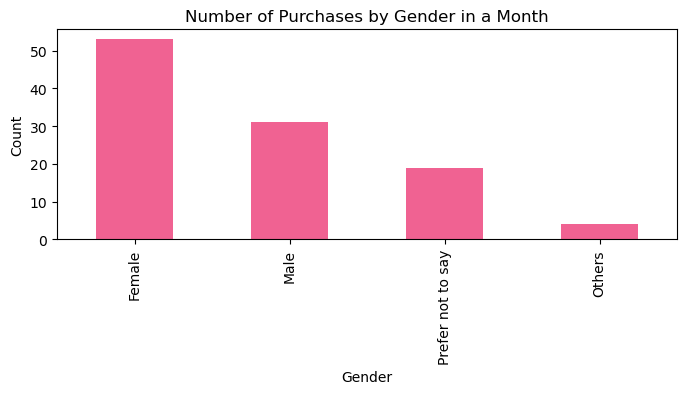

In [35]:
# Filter data for purchases in a month
purchases_in_month = df[df['Purchase_Frequency'] == 'Once a month']

# Count purchases by gender in a month
purchase_counts_month = purchases_in_month['Gender'].value_counts()


# Create a larger figure
plt.figure(figsize=(8, 6))

# Plotting the bar chart for purchases in a month
plt.subplot(2, 1, 1)
purchase_counts_month.plot(kind='bar', color='#F06292')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Purchases by Gender in a Month')


From the data, it is evident that the highest purchase category is beauty and personal care, indicating that females constitute the largest group of purchasers on the website.

<Axes: xlabel='age', ylabel='count'>

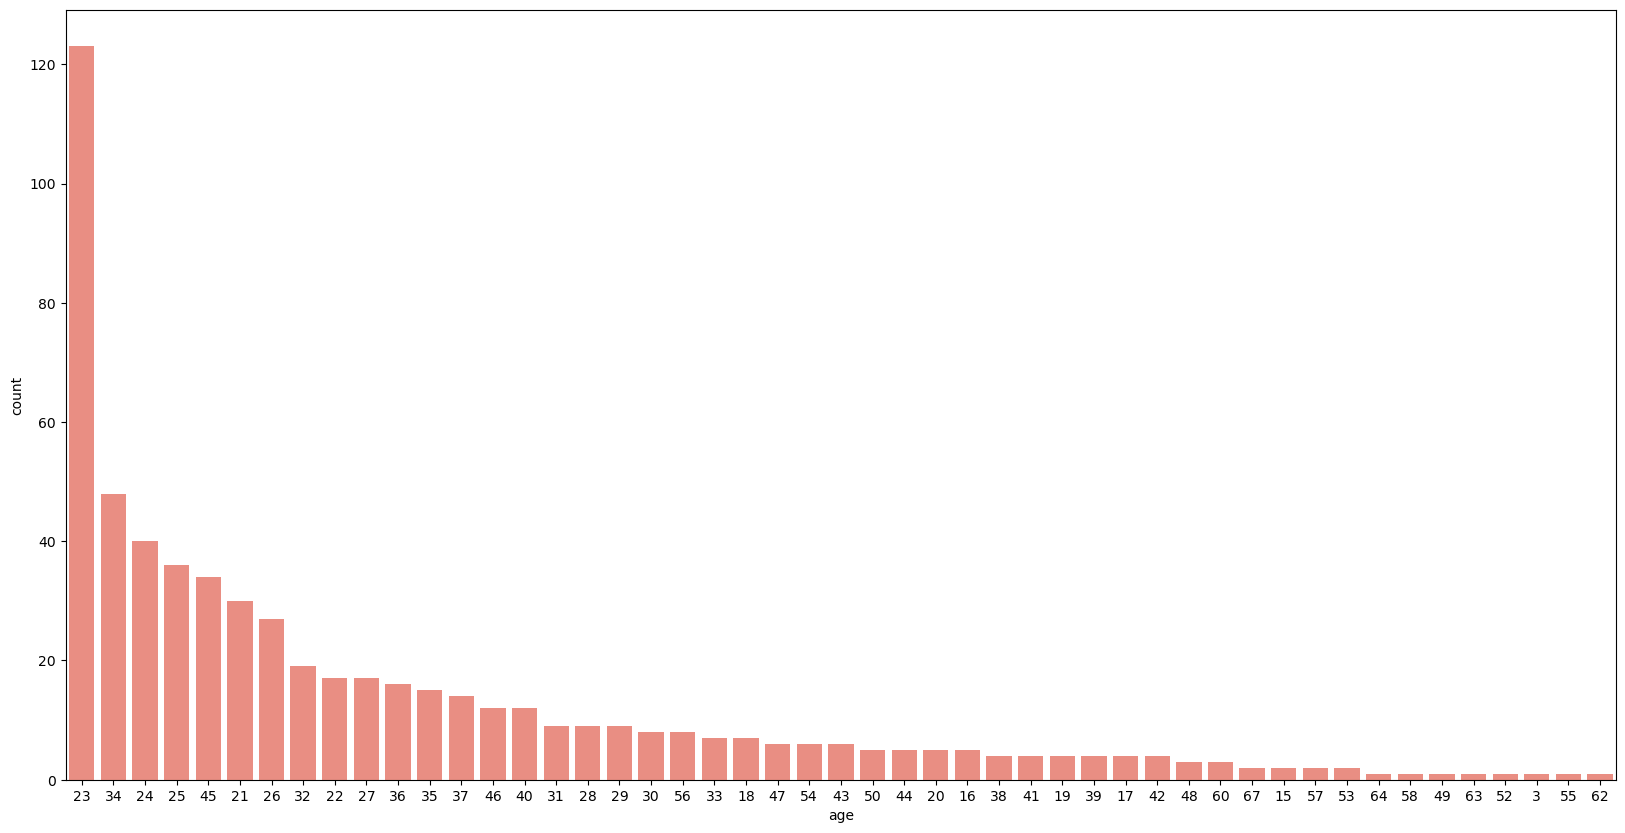

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', order = df['age'].value_counts().index[0:-1],palette =['#fa8072'],data = df)

(array([  1.,   3.,  72., 252., 100.,  69.,  67.,  18.,  15.,   5.]),
 array([ 3. ,  9.4, 15.8, 22.2, 28.6, 35. , 41.4, 47.8, 54.2, 60.6, 67. ]),
 <BarContainer object of 10 artists>)

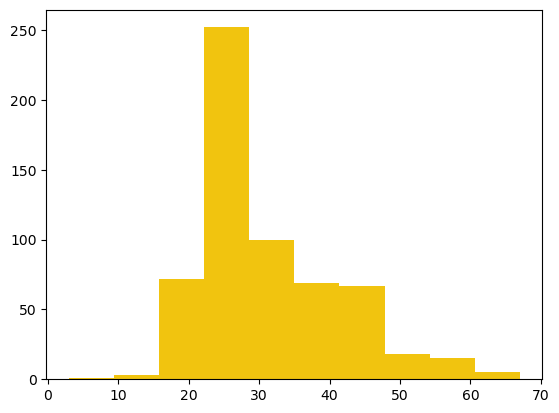

In [37]:
#Histogram of ages
plt.hist(data=df,x='age', color = "#F1C40F")

We can see from the visualization that the majority of the consumers fall into '23' age followed by 34,24,25 etc.

Age group between 20-40 are the main consumers.

<Axes: xlabel='Cart_Abandonment_Factors', ylabel='count'>

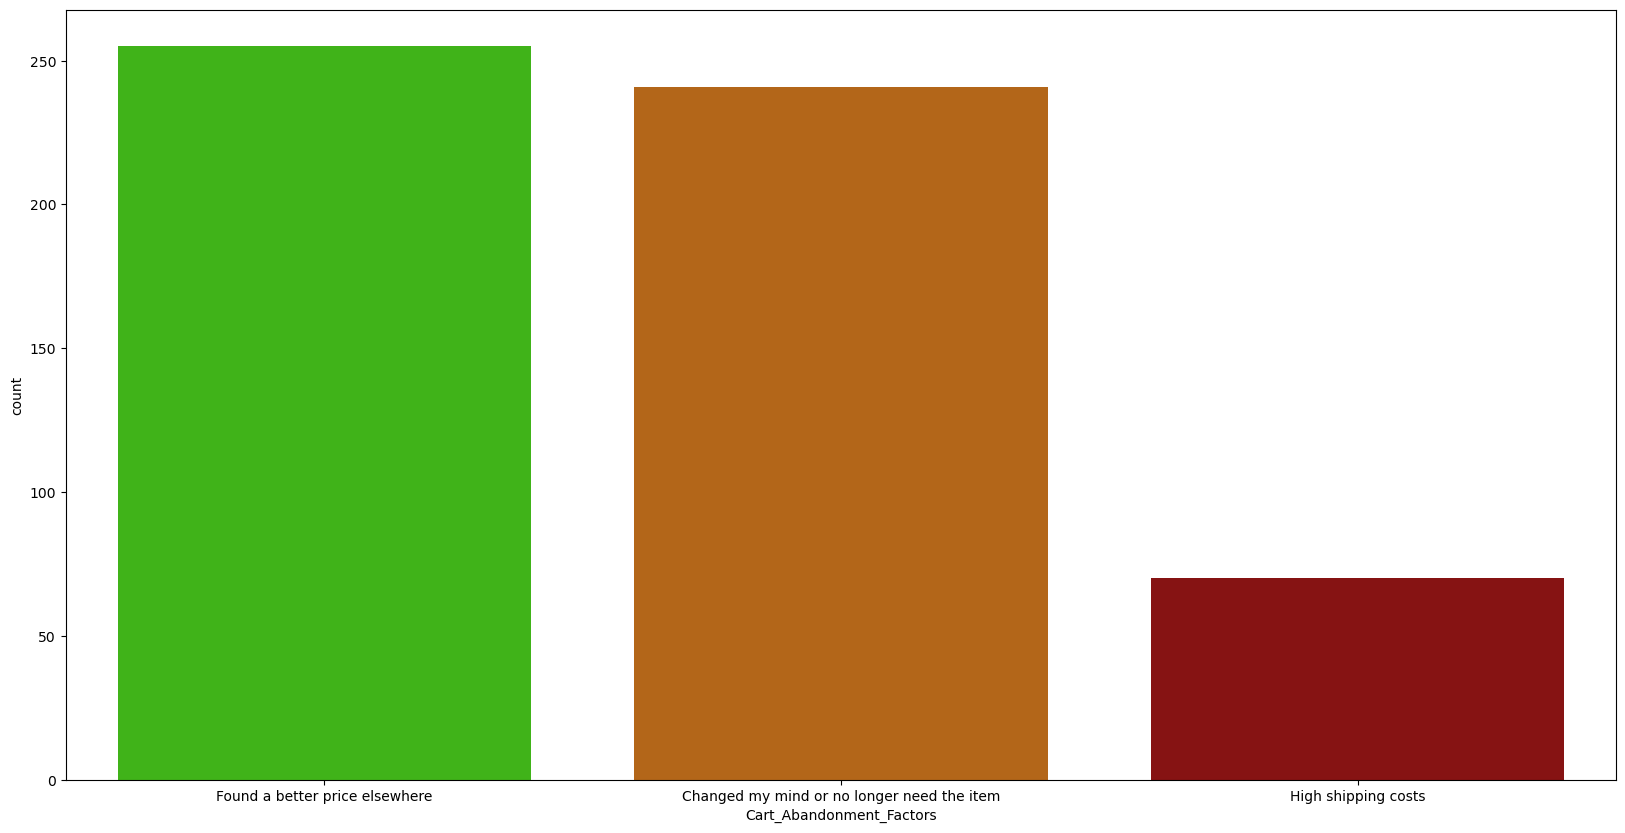

In [38]:
#Bar chart of cart abandonment factors
plt.figure(figsize=(20,10))
sns.countplot(x='Cart_Abandonment_Factors', order = df['Cart_Abandonment_Factors'].value_counts().index[0:-1],palette =['#33CC00','#CC6600','#990000'],data = df)

The data indicates that a significant number of consumers abandoned their carts due to finding better prices elsewhere. To address this issue and reduce cart abandonment, we can consider two potential solutions: offering products at a competitive price compared to other sites or providing enticing add-on benefits such as coupons or cashbacks for purchases made on our website.

Text(0.5, 1.0, 'Box Plot - Age vs Gender')

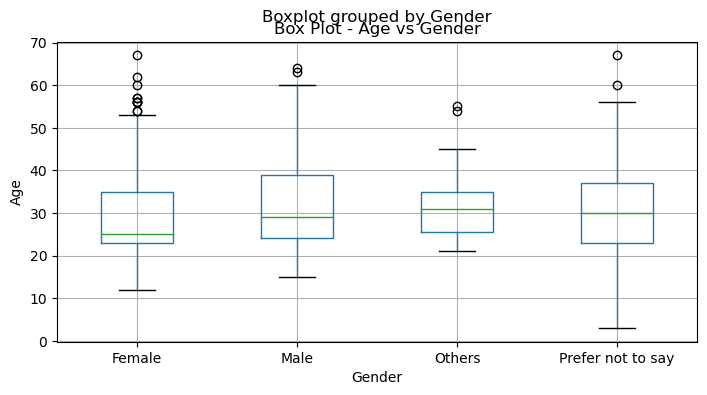

In [39]:
#Boxplot Age vs Gender
ax = df.boxplot(column = "age", by = "Gender", figsize = (8,4))
ax.set_ylabel("Age")
ax.set_title("Box Plot - Age vs Gender")

The data above indicates that both females and males fall within the age range of 20 to 30 years old.